In [5]:
include("utils/preprocessing.jl")
include("utils/data_loader.jl")
include("utils/visualization.jl")
include("utils/crossvalidation.jl")

evaluateAndPrintMetricsRanking (generic function with 1 method)

In [6]:
""" Importing and installing packages """

# import Pkg;
# Pkg.add("Random")
# Pkg.add("MLBase")
# Pkg.add("JLD")
# Pkg.add("ScikitLearn")
# Pkg.add("DecisionTree")

using Random
Random.seed!(123)

using ScikitLearn
using JLD

# DESCRIPTION OF APPROACH #

## Overview

This approach to star classification introduces a key modification: the use of unbalanced data, contrasting the previous method which employed a balanced dataset. Additionally, we have reduced the dataset size to 5% of the total data. This reduction addresses the increased execution time that unbalanced data typically demands, as dealing with disproportionate class distributions can complicate and prolong the training process. Despite the reduced dataset size, we continue to apply Principal Component Analysis (PCA), retaining 95% of the data's variability to maintain the essence of the dataset while reducing dimensionality.

## Ensemble Model

In this iteration, our ensemble model adopts a weighted majority voting technique. This method differs from our previous soft voting strategy by assigning weights to each model's predictions, reflecting their respective performance levels. Our ensemble comprises the same set of models: K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Artificial Neural Network (ANN), and Decision Tree (DT). However, each model's influence in the final prediction is now adjusted based on its demonstrated accuracy and reliability. This weighted approach is designed to leverage the strengths of each model more effectively, potentially leading to improved classification accuracy in an unbalanced data scenario.

----------------------------------------------------------------------------------------------

## Data Load and Preprocessing

In [7]:
# Load the data
data = DataLoader.load_data("dataset\\star_classification.csv");

# preprocess_data(dataset, reducing_ratio, holdOut ratio, normalization method, balancing_dataset, features)
train_inputs, train_targets, test_inputs, test_targets = Preprocessing.preprocess_data(data, 0.05, 0.2, "zero_mean", false, [4,5,6,7,8,15])

"""    This function does the following:
        - Reduce the data using the reducing ratio if chosen to do so
        - Balance the data using the undersampling method if chosen to do so
        - Parse the data: chosing the correct columns for inputs and targets
        - Splits the data into training and testing using holdOut method
        - Normalize the inputs using the chosen method
"""

println("Number of training inputs: ", size(train_inputs, 1))
println("Number of training targets: ", size(train_targets, 1))
println("Number of testing inputs: ", size(test_inputs, 1))
println("Number of testing targets: ", size(test_targets, 1))

Number of training inputs: 4002
Number of training targets: 4002
Number of testing inputs: 1000
Number of testing targets: 1000


#### Applying PCA to input features ####

In [8]:
@sk_import decomposition:PCA

#We keep 95% of the variance
pca = PCA(0.95)
fit!(pca, train_inputs)

#Once it is ajusted it can be used to transform the data
train_inputs = pca.transform(train_inputs)
test_inputs = pca.transform(test_inputs)

#We go from 6 initial features to 3
print("Train Patterns ", size(train_inputs))
print("Train Patterns ", size(test_inputs))

Train Patterns (4002, 3)Train Patterns (1000, 3)

## Testing Hyperparameters for Each Model ##

In [9]:
@sk_import neural_network: MLPClassifier;
@sk_import svm: SVC;
@sk_import tree: DecisionTreeClassifier;
@sk_import neighbors: KNeighborsClassifier;
@sk_import ensemble: RandomForestClassifier;
@sk_import ensemble: StackingClassifier;
@sk_import metrics: accuracy_score;

In [10]:
"""
Setting indices for the k-fold cross-validation
    we are about to do with the different models
"""
N=size(train_inputs,1)
k = 5 # number of folds
kFoldIndices = crossvalidation(N, k);

##### DECISION TREE #####

In [11]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
dtree_hyperparameters_array = [
    Dict("max_depth" => 3),
    Dict("max_depth" => 5),
    Dict("max_depth" => 10),
    Dict("max_depth" => 20),
    Dict("max_depth" => 50),
    Dict("max_depth" => 100) # Deeper trees can capture more detail but risk overfitting
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:DecisionTree,dtree_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc -----
Set of hyperparameters 4 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 5 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 6 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 3 -> mean: 0.886 Std. Dev.: 0.01
Set of hyperparameters 2 -> mean: 0.849 Std. Dev.: 0.007
Set of hyperparameters 1 -> mean: 0.828 Std. Dev.: 0.012

----- sensitivity -----
Set of hyperparameters 4 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 5 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 6 -> mean: 0.888 Std. Dev.: 0.01
Set of hyperparameters 3 -> mean: 0.886 Std. Dev.: 0.01
Set of hyperparameters 2 -> mean: 0.849 Std. Dev.: 0.007
Set of hyperparameters 1 -> mean: 0.828 Std. Dev.: 0.012

----- specificity -----
Set of hyperparameters 

##### kNN #####

In [12]:
# Define an array of hyperparameter dictionaries for the kNN model
knn_hyperparameters_array = [
    Dict("n_neighbors" => 5),
    Dict("n_neighbors" => 10),
    Dict("n_neighbors" => 15),
    Dict("n_neighbors" => 20),
    Dict("n_neighbors" => 50),
    Dict("n_neighbors" => 100) # Large neighborhoods, smooths out predictions
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:kNN,knn_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc -----
Set of hyperparameters 1 -> mean: 0.921 Std. Dev.: 0.004
Set of hyperparameters 2 -> mean: 0.911 Std. Dev.: 0.011
Set of hyperparameters 3 -> mean: 0.904 Std. Dev.: 0.014
Set of hyperparameters 4 -> mean: 0.894 Std. Dev.: 0.012
Set of hyperparameters 5 -> mean: 0.876 Std. Dev.: 0.012
Set of hyperparameters 6 -> mean: 0.846 Std. Dev.: 0.013

----- sensitivity -----
Set of hyperparameters 1 -> mean: 0.921 Std. Dev.: 0.004
Set of hyperparameters 2 -> mean: 0.911 Std. Dev.: 0.011
Set of hyperparameters 3 -> mean: 0.904 Std. Dev.: 0.014
Set of hyperparameters 4 -> mean: 0.894 Std. Dev.: 0.012
Set of hyperparameters 5 -> mean: 0.876 Std. Dev.: 0.012
Set of hyperparameters 6 -> mean: 0.846 Std. Dev.: 0.013

----- specificity -----
Set of hyperpar

##### SVM #####

In [13]:
svm_hyperparameters_array = [
    # Uses 'rbf' kernel, medium complexity with C=1.0, default polynomial degree, 'scale' for gamma 
    Dict("kernel" => "rbf", "degree" => 3, "C" => 1.0, "gamma" => "scale"),
    
    # Same 'rbf' kernel, increased penalty (C=10.0) for larger-margin separation, 'auto' gamma adjusts based on features
    Dict("kernel" => "rbf", "degree" => 3, "C" => 10.0, "gamma" => "auto"),
    
    # Same 'rbf' kernel, lower penalty (C=0.1) for a softer-margin, 'scale' gamma is default scaling
    Dict("kernel" => "rbf", "degree" => 3, "C" => 0.1, "gamma" => "scale"),

    # 'linear' kernel, suitable for less complex data
    Dict("kernel" => "linear", "degree" => 5,  "C" => 0.1, "gamma" => "auto"),
    
    # 'linear' kernel, not affected by 'degree' or 'gamma', with C=1.0 indicating a balance between margin and misclassification
    Dict("kernel" => "linear", "degree" => 3, "C" => 1.0, "gamma" => "auto"),

    # 'linear' kernel with a higher penalty, stricter margin
    Dict("kernel" => "linear", "degree" => 7, "C" => 10.0, "gamma" => "scale"),
    
    # 'poly' kernel, polynomial degree is set twice by mistake, should only be 'degree' => 3, 'scale' gamma defaults to feature scale
    Dict("kernel" => "poly", "degree" => 3, "C" => 1.0, "gamma" => "scale"),
    
    # 'poly' kernel, increased polynomial degree (5) for higher model complexity, 'auto' gamma may overfit with high dimension
    Dict("kernel" => "poly", "degree" => 5, "C" => 1.0, "gamma" => "auto")
]


# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:SVM, svm_hyperparameters_array, train_inputs, train_targets, kFoldIndices)

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc -----
Set of hyperparameters 2 -> mean: 0.951 Std. Dev.: 0.007
Set of hyperparameters 6 -> mean: 0.951 Std. Dev.: 0.006
Set of hyperparameters 5 -> mean: 0.939 Std. Dev.: 0.005
Set of hyperparameters 1 -> mean: 0.928 Std. Dev.: 0.006
Set of hyperparameters 4 -> mean: 0.907 Std. Dev.: 0.007
Set of hyperparameters 3 -> mean: 0.877 Std. Dev.: 0.014
Set of hyperparameters 8 -> mean: 0.852 Std. Dev.: 0.01
Set of hyperparameters 7 -> mean: 0.836 Std. Dev.: 0.008

----- sensitivity -----
Set of hyperparameters 2 -> mean: 0.951 Std. Dev.: 0.007
Set of hyperparameters 6 -> mean: 0.951 Std. Dev.: 0.006
Set of hyperparameters 5 -> mean: 0.939 Std. Dev.: 0.005
Set of hyperparamete

##### ANN #####

In [14]:
# Define an array of hyperparameter dictionaries for the ANN model
ann_hyperparameters_array = [
    # Two-layer architecture, moderate neurons
    Dict("architecture" => [50, 30], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer architecture, fewer neurons
    Dict("architecture" => [30], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, different activation function
    Dict("architecture" => [50, 30], "activation" => "tanh", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, lower learning rate
    Dict("architecture" => [30], "activation" => "relu", "learning_rate" => 0.001, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, higher learning rate
    Dict("architecture" => [50, 30], "activation" => "relu", "learning_rate" => 0.05, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, logistic activation
    Dict("architecture" => [30], "activation" => "logistic", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # Two-layer, more neurons, different activation
    Dict("architecture" => [70, 40], "activation" => "tanh", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345),

    # One-layer, more neurons
    Dict("architecture" => [50], "activation" => "relu", "learning_rate" => 0.01, "validation_ratio" => 0.1, "n_iter_no_change" => 80, "max_iter" => 1000, "repetitionsTraining" => 10, "random_state" => 12345)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
evaluateAndPrintMetricsRanking(:ANN, ann_hyperparameters_array, train_inputs, train_targets, kFoldIndices) 

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc -----
Set of hyperparameters 3 -> mean: 0.96 Std. Dev.: 0.003
Set of hyperparameters 7 -> mean: 0.96 Std. Dev.: 0.003
Set of hyperparameters 1 -> mean: 0.959 Std. Dev.: 0.004
Set of hyperparameters 5 -> mean: 0.959 Std. Dev.: 0.003
Set of hyperparameters 8 -> mean: 0.958 Std. Dev.: 0.005
Set of hyperparameters 2 -> mean: 0.958 Std. Dev.: 0.007
Set of hyperparameters 6 -> mean: 0.956 Std. Dev.: 0.006
Set of hyperparameters 4 -> mean: 0.946 Std. Dev.: 0.006

----- sensitivity -----
Set of hyperparameters 3 -> mean: 0.96 Std. Dev.: 0.003
Set of hyperparameters 7 -> mean: 0.96 Std. Dev.: 0.003
Set of hyperparameters 1 -> mean: 0.959 Std. Dev.: 0.004
Set of hyperparameters 

## Training Models On The Entire Dataset ##

In [30]:
""" DECISION TREE MODEL """

using DecisionTree

dt_model = DecisionTreeClassifier(max_depth=20, random_state=12345)
println("After calling the model")

# Fit the model on the training data
ScikitLearn.fit!(dt_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(dt_model, test_inputs)

# Calculate and print the accuracy
DT_acc, DT_error_rate, DT_sensitivity, DT_specificity, DT_PPV, DT_NPV, DT_F_score, DT_confusion = confusionMatrix(predicted_targets, test_targets)

println("Decision Tree model accuracy: $(DT_acc * 100) %")
println("Decision Tree model sensitivity: $(DT_sensitivity * 100) %")
println("Decision Tree model specificity: $(DT_specificity * 100) %")
println("Decision Tree model PPV: $(DT_PPV * 100) %")
println("Decision Tree model NPV: $(DT_NPV * 100) %")
println("Decision Tree model sensitivity: $(DT_F_score * 100) %")

# Save the model
#JLD.save("dt_model_4th.jld", "model", dt_model)

After calling the model
Decision Tree model accuracy: 87.5 %
Decision Tree model sensitivity: 87.5 %
Decision Tree model specificity: 92.56844998730912 %
Decision Tree model PPV: 88.48637246090969 %
Decision Tree model NPV: 87.11362474444282 %
Decision Tree model sensitivity: 87.66379677190568 %


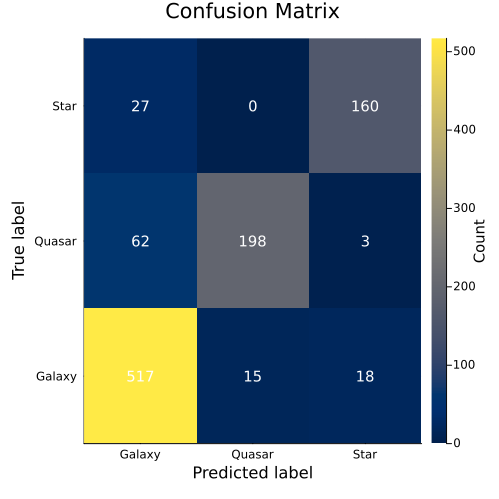

In [35]:
""" Printing the confusion matrix """
p0 = Visualization.plot_confusion_heatmap(DT_confusion)
display(p0)

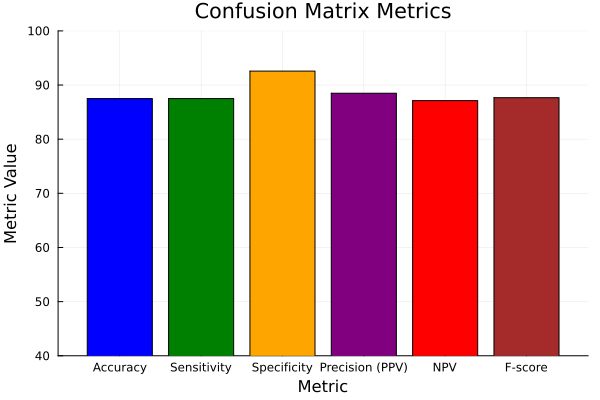

In [17]:
Visualization.plot_confusion_metrics(DT_acc, DT_sensitivity, DT_specificity, DT_PPV, DT_NPV, DT_F_score)

In [18]:
""" KNN MODEL """
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
ScikitLearn.fit!(knn_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(knn_model, test_inputs)

# Calculate and print the accuracy
KNN_acc, KNN_error_rate, KNN_sensitivity, KNN_specificity, KNN_PPV, KNN_NPV, KNN_F_score, KNN_confusion = confusionMatrix(predicted_targets, test_targets)

println("KNN model accuracy: $(KNN_acc * 100) %")
println("KNN model sensitivity: $(KNN_sensitivity * 100) %")
println("KNN model specificity: $(KNN_specificity * 100) %")
println("KNN model PPV: $(KNN_PPV * 100) %")
println("KNN model NPV: $(KNN_NPV * 100) %")
println("KNN model sensitivity: $(KNN_F_score * 100) %")

# Save the model
#JLD.save("knn_model_4th.jld", "model", knn_model)

KNN model accuracy: 92.0 %
KNN model sensitivity: 92.0 %
KNN model specificity: 94.83768259939417 %
KNN model PPV: 92.53535155279503 %
KNN model NPV: 91.54455614973263 %
KNN model sensitivity: 92.1038457413755 %


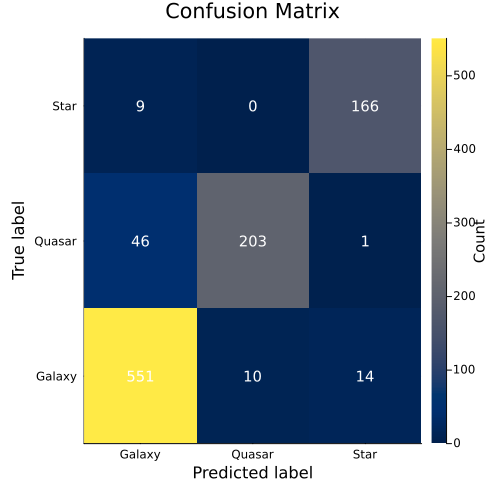

In [19]:
""" Printing the confusion matrix """
p1 = Visualization.plot_confusion_heatmap(KNN_confusion)
display(p1)

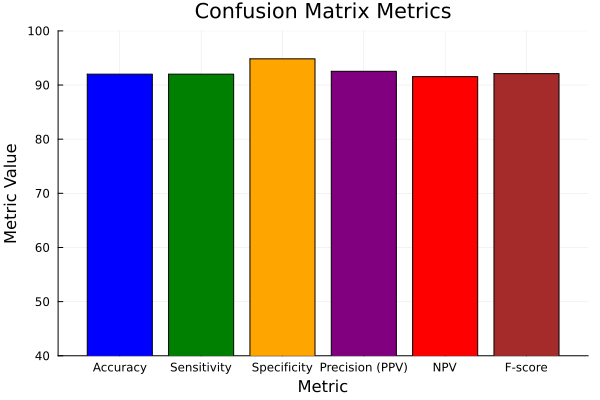

In [20]:
Visualization.plot_confusion_metrics(KNN_acc, KNN_sensitivity, KNN_specificity, KNN_PPV, KNN_NPV, KNN_F_score)

In [31]:
""" ANN MODEL """

ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=1000, random_state=12345)

# Fit the model on the training data
ScikitLearn.fit!(ann_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = ScikitLearn.predict(ann_model, test_inputs)

# Calculate and print the accuracy
ANN_acc, ANN_error_rate, ANN_sensitivity, ANN_specificity, ANN_PPV, ANN_NPV, ANN_F_score, ANN_confusion = confusionMatrix(predicted_targets, test_targets)

println("ANN model accuracy: $(ANN_acc * 100) %")
println("ANN model sensitivity: $(ANN_sensitivity * 100) %")
println("ANN model specificity: $(ANN_specificity * 100) %")
println("ANN model PPV: $(ANN_PPV * 100) %")
println("ANN model NPV: $(ANN_NPV * 100) %")
println("ANN model sensitivity: $(ANN_F_score * 100) %")

# Save the model
#JLD.save("ann_model_4th.jld", "model", ann_model)

ANN model accuracy: 94.0 %
ANN model sensitivity: 94.0 %
ANN model specificity: 96.88995694107956 %
ANN model PPV: 94.56425585724726 %
ANN model NPV: 93.07562703962702 %
ANN model sensitivity: 94.07540162950058 %


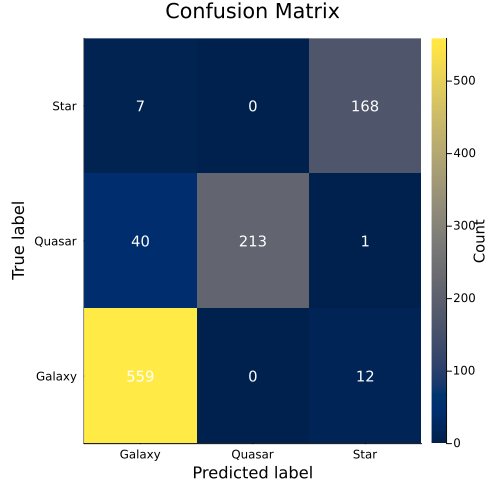

In [22]:
""" Printing the confusion matrix """
p2 = Visualization.plot_confusion_heatmap(ANN_confusion)
display(p2)

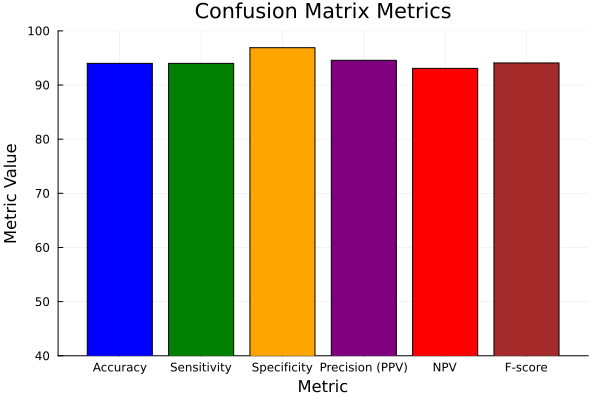

In [23]:
Visualization.plot_confusion_metrics(ANN_acc, ANN_sensitivity, ANN_specificity, ANN_PPV, ANN_NPV, ANN_F_score)

In [32]:
""" SVM MODEL """

svm_model = SVC(kernel = "rbf", degree = 3, C = 10.0, gamma = "auto")

# Fit the model on the training data
fit!(svm_model, train_inputs, train_targets)

# Predict the targets for the test data
predicted_targets = predict(svm_model, test_inputs)

# Calculate and print the accuracy
SVM_acc, SVM_error_rate, SVM_sensitivity, SVM_specificity, SVM_PPV, SVM_NPV, SVM_F_score, SVM_confusion = confusionMatrix(predicted_targets, test_targets)

println("SVM model accuracy: $(SVM_acc * 100) %")
println("SVM model sensitivity: $(SVM_sensitivity * 100) %")
println("SVM model specificity: $(SVM_specificity * 100) %")
println("SVM model PPV: $(SVM_PPV * 100) %")
println("SVM model NPV: $(SVM_NPV * 100) %")
println("SVM model sensitivity: $(SVM_F_score * 100) %")

# Save the model
#JLD.save("svm_model_4th.jld", "model", svm_model)

SVM model accuracy: 93.10000000000001 %
SVM model sensitivity: 93.09999999999998 %
SVM model specificity: 96.52956077198299 %
SVM model PPV: 93.82998688113825 %
SVM model NPV: 91.94841971800439 %
SVM model sensitivity: 93.194315674764 %


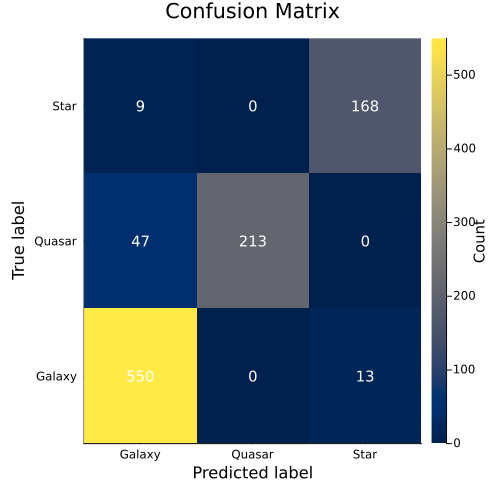

In [33]:
""" Printing the confusion matrix """
p3 = Visualization.plot_confusion_heatmap(SVM_confusion)
display(p3)

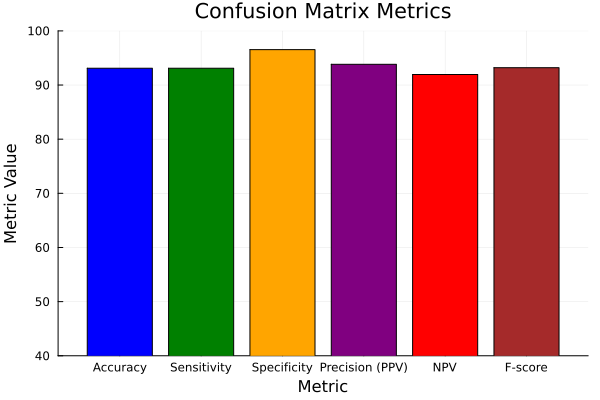

In [34]:
Visualization.plot_confusion_metrics(SVM_acc, SVM_sensitivity, SVM_specificity, SVM_PPV, SVM_NPV, SVM_F_score)

##### ENSEMBLE MODEL #####

In [43]:
using ScikitLearn
@sk_import ensemble: VotingClassifier
@sk_import metrics: accuracy_score

# Define the base models with the chosen hyperparameters
dt_model = DecisionTreeClassifier(max_depth=20, random_state=12345)
knn_model = KNeighborsClassifier(n_neighbors=5)
ann_model = MLPClassifier(hidden_layer_sizes=(50, 30), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=1000, random_state=12345)
svm_model = SVC(kernel="rbf", degree=3, C=10.0, gamma="auto", probability=true)

# Create a list of tuples (name, model) for the base models
base_models = [
    ("DecisionTree", dt_model),
    ("kNN", knn_model),
    ("ANN", ann_model),
    ("SVM", svm_model)
]

# Define weights based on model performance (example weights, adjust based on actual performance)
weights = [1, 2, 4, 3]  # Higher weight for better performing models

# Create the weighted majority voting ensemble
ensemble = VotingClassifier(estimators=base_models, voting="soft", weights=weights)

# Train the ensemble model
ScikitLearn.fit!(ensemble, train_inputs, train_targets)

# Evaluate the ensemble model
predicted_targets = ScikitLearn.predict(ensemble, test_inputs)
Ens_acc, Ens_error_rate, Ens_sensitivity, Ens_specificity, Ens_PPV, Ens_NPV, Ens_F_score, Ens_confusion = confusionMatrix(predicted_targets, test_targets)

println("Weighted Majority Voting Ensemble model accuracy: $(Ens_acc * 100) %")
println("Ensemble model sensitivity: $(Ens_sensitivity * 100) %")
println("Ensemble model specificity: $(Ens_specificity * 100) %")
println("Ensemble model PPV: $(Ens_PPV * 100) %")
println("Ensemble model NPV: $(Ens_NPV * 100) %")
println("Ensemble model F-score: $(Ens_F_score * 100) %")

# Optionally, save the model
#JLD.save("weighted_ensemble.jld", "model", ensemble)


Weighted Majority Voting Ensemble model accuracy: 94.19999999999999 %
Ensemble model sensitivity: 94.19999999999999 %
Ensemble model specificity: 96.94408654717867 %
Ensemble model PPV: 94.71046148092745 %
Ensemble model NPV: 93.32837101696117 %
Ensemble model F-score: 94.26692346214608 %


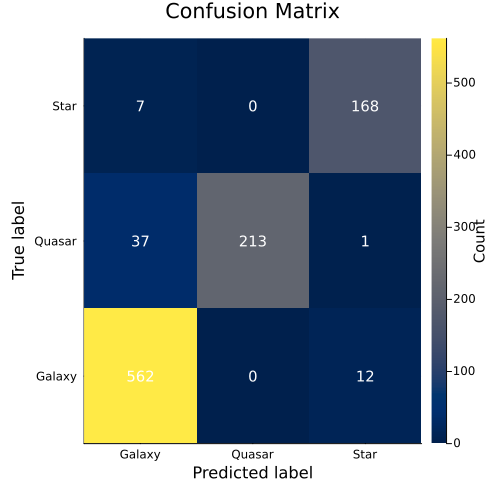

In [37]:
""" Printing the confusion matrix """
p4 = Visualization.plot_confusion_heatmap(Ens_confusion)
display(p4)

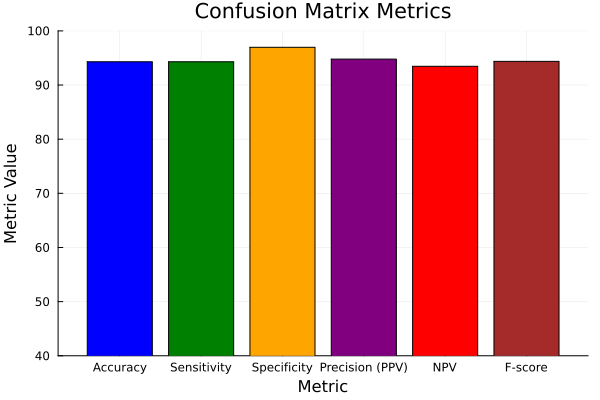

In [38]:
Visualization.plot_confusion_metrics(Ens_acc, Ens_sensitivity, Ens_specificity, Ens_PPV, Ens_NPV, Ens_F_score)

## Best Model Configuration and Performance

After extensive experimentation with various normalization configurations and cross-validation folds, utilizing **zero-mean** normalization in conjunction with a **5-fold** cross-validation yielded the most promising results. Decreasing the number of folds showed a small improvement on the ensemble metrics paired with a decrease in DT performance. The following table presents the top-performing models and their respective metrics under this configuration:

- **Artificial Neural Network (ANN)**: The best-performing ANN model uses the architecture [50, 30] with 'tanh' activation, a learning rate of 0.01, a validation fraction of 0.1, and a maximum of 10000 iterations.

- **Support Vector Machine (SVM)**: The SVM model that performed best had the 'rbf' kernel with a degree of 3, a C value of 10.0, and 'auto' gamma setting.

- **Decision Tree**: The best decision tree model had a maximum depth of 50.

- **K-Nearest Neighbors (KNN)**: The KNN model that yielded the best results had 5 neighbors, indicating a moderate level of complexity.

- **Ensemble Model**: The ensemble combines Decision Tree, kNN, ANN, and SVM models using soft voting classifier.

Here are the performance metrics (k=10 zero-mean):

| Best Model Configuration | Accuracy | Sensitivity | Specificity | PPV   | NPV   | F_Score |
|--------------------------|----------|-------------|-------------|-------|-------|---------|
| ANN                      | 94.0     | 94.0        | 96.89       | 94.56 | 93.08 | 94.08   |
| SVM                      | 93.1     | 93.1        | 96.53       | 93.83 | 91.95 | 93.19   |
| Decision Tree            | 87.5     | 87.5        | 92.57       | 88.49 | 87.11 | 87.66   |
| KNN                      | 92.0     | 92.0        | 94.84       | 92.54 | 91.54 | 92.10   |
| Ensemble                 | 94.2     | 94.2        | 96.94       | 94.71 | 93.33 | 94.27   |


### Best performing model 

The Ensemble model now outperforms the others with the highest accuracy, slightly outperforming the ANN and SVM models. This superior performance can be attributed to several factors. Firstly, ensemble methods are particularly effective as they combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability and robustness over a single estimator. Secondly, the Ensemble model's performance was enhanced by assigning appropriate weights to each model based on its performance. Lastly, ensemble methods are robust against overfitting, especially in cases where the data is balanced.

-----------------------------------------------------------------------------------------------------

## Best configuration with number of folds decreased to 5 and minmax

### Weak Models And Chosen Parameters

1. **K-Nearest Neighbors (KNN):**
   - Parameters: `n_neighbors=5`

2. **Support Vector Machine (SVM):**
   - Parameters: `kernel="rbf", degree=3, C=1.0, gamma="scale"`

3. **Artificial Neural Network (ANN):**
   - Architecture: `hidden_layer_sizes=(70, 40), activation="tanh", learning_rate_init=0.01, validation_fraction=0.1, n_iter_no_change=80, max_iter=10000`

4. **Decision Tree (DT):**
   - Parameters: `max_depth=10`


For min-max k=5:

| Best Model Configuration | Accuracy | Sensitivity | Specificity | PPV   | NPV   | F_Score |
|--------------------------|----------|-------------|-------------|-------|-------|---------|
| ANN                      | 74.9     | 74.9        | 73.36       | 78.50 | 79.36 | 72.55   |
| SVM                      | 89.1     | 89.1        | 93.12       | 89.67 | 88.63 | 89.20   |
| Decision Tree            | 79.1     | 79.1        | 80.44       | 79.05 | 82.93 | 78.93   |
| KNN                      | 84.2     | 84.2        | 88.46       | 84.61 | 84.87 | 84.26   |
| Ensemble                 | 86.3     | 86.3        | 89.39       | 86.54 | 86.83 | 86.33   |


As we can see, the metrics generally deteriorate when we opt for the min-max method over zero-mean normalization. This indicates that the normal distribution of the data becomes increasingly significant after applying PCA. Although the results may not be perfect, it's evident that the combination of the four base models into an ensemble model has resulted in improved performance.